In [2]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

In [3]:
dataset_mapping = {
    '../Results/MouseAtlas/0.2': 'big',
    '../Results/MouseAtlas/0.4': 'big',
    '../Results/MouseAtlas/0.6': 'big',
    '../Results/MouseAtlas/0.8': 'big',
    '../Results/MouseAtlas/1.0': 'big',
    '../Results/HSC/0.2': 'big',
    '../Results/HSC/0.4': 'big',
    '../Results/HSC/0.6': 'big',
    '../Results/HSC/0.8': 'big',
    '../Results/HSC/1.0': 'big',
    '../Results/PBMC5K/0.2': 'big',
    '../Results/PBMC5K/0.4': 'big',
    '../Results/PBMC5K/0.6': 'big',
    '../Results/PBMC5K/0.8': 'big',
    '../Results/PBMC5K/1.0': 'big',
}

dataset_cell_mapping = {
    '../Results/MouseAtlas/0.2': 'big',
    '../Results/MouseAtlas/0.4': 'big',
    '../Results/MouseAtlas/0.6': 'big',
    '../Results/MouseAtlas/0.8': 'big',
    '../Results/MouseAtlas/1.0': 'big',
    '../Results/HSC/0.2': 'big',
    '../Results/HSC/0.4': 'big',
    '../Results/HSC/0.6': 'big',
    '../Results/HSC/0.8': 'big',
    '../Results/HSC/1.0': 'big',
    '../Results/PBMC5K/0.2': 'big',
    '../Results/PBMC5K/0.4': 'big',
    '../Results/PBMC5K/0.6': 'big',
    '../Results/PBMC5K/0.8': 'big',
    '../Results/PBMC5K/1.0': 'big',
}

named_titles = {
    '../Results/MouseAtlas/0.2': 'MouseAtlas 0.2',
    '../Results/MouseAtlas/0.4': 'MouseAtlas 0.4',
    '../Results/MouseAtlas/0.6': 'MouseAtlas 0.6',
    '../Results/MouseAtlas/0.8': 'MouseAtlas 0.8',
    '../Results/MouseAtlas/1.0': 'MouseAtlas 1.0',
    '../Results/HSC/0.2': 'HSC 0.2',
    '../Results/HSC/0.4': 'HSC 0.4',
    '../Results/HSC/0.6': 'HSC 0.6',
    '../Results/HSC/0.8': 'HSC 0.8',
    '../Results/HSC/1.0': 'HSC 1.0',
    '../Results/PBMC5K/0.2': 'PBMC 0.2',
    '../Results/PBMC5K/0.4': 'PBMC 0.4',
    '../Results/PBMC5K/0.6': 'PBMC 0.6',
    '../Results/PBMC5K/0.8': 'PBMC 0.8',
    '../Results/PBMC5K/1.0': 'PBMC 1.0',
}

sampling_method = {
    '../Results/MouseAtlas/0.2': 0.2,
    '../Results/MouseAtlas/0.4': 0.4,
    '../Results/MouseAtlas/0.6': 0.6,
    '../Results/MouseAtlas/0.8': 0.8,
    '../Results/MouseAtlas/1.0': 1.0,
    '../Results/HSC/0.2': 0.2,
    '../Results/HSC/0.4': 0.4,
    '../Results/HSC/0.6': 0.6,
    '../Results/HSC/0.8': 0.8,
    '../Results/HSC/1.0': 1.0,
    '../Results/PBMC5K/0.2': 0.2,
    '../Results/PBMC5K/0.4': 0.4,
    '../Results/PBMC5K/0.6': 0.6,
    '../Results/PBMC5K/0.8': 0.8,
    '../Results/PBMC5K/1.0': 1.0,
}

In [4]:
def process(datasets, dtype='big', output_fname: str = 'Nen'):
    
    fig, ax = plt.subplots(nrows=1, ncols=len(datasets), figsize=(10 * len(datasets), 10))
    
    results = []
    results_plotted = []
    
    for index, dataset in enumerate(datasets):
        values = []

        for fname in glob.glob(f'{dataset}/*.csv'):
            print(fname)
            df = pd.read_csv(fname)
            values.append(df)
        concated = pd.concat(values)
        
        concated['dtype'] = dataset_mapping[dataset]
        concated['cell_dtype'] = dataset_cell_mapping[dataset]
        concated['sampling_method'] = sampling_method[dataset]
        results.append(concated)

        concated = concated.drop(['sampling_method'], axis=1)
        concated['rank'] = concated.groupby('Metric')['vals'].rank(method="dense", ascending=False)
        distance = concated[concated.Metric.str.contains('distance')]
        distance = distance[distance.Metric != 'distance_pca']
        distance_order = distance.groupby('method').mean('vals')
#         print(distance_order)
        distance_order.columns = ['mean_val_distance', 'mean_rank_distance']
        not_distance = concated[~concated.Metric.str.contains('distance')]
        not_distance_order = not_distance.groupby('method').mean('vals')
        not_distance_order.columns = ['mean_val_not_distance', 'mean_rank_not_distance']
        result = distance_order.join(not_distance_order)
        
#         print(result.head())
#         print(result.index)
        plot = sns.scatterplot(
            data=result,
            x='mean_val_distance',
            y='mean_val_not_distance',
            hue=result.index,
            ax=ax[index],
            s=200,
            hue_order=['threshold', 'cicero', 'boruta', 'scopen_threshold',  'scopen_cicero', 'scopen_boruta', 'scale_threshold', 'scale_cicero', 'scale_boruta']
        )

        plot.set_title(named_titles[dataset], fontsize=30)
        plot.set_xlabel(f'Mean Distance Score', fontsize=30)
        plot.set_ylabel(f'Mean Label Score', fontsize=30)
        plot.set_ylim(0.2, 0.8)
        plot.set_xlim(-0.2, 0.3)
        plot.legend(fontsize=15, markerscale=2, loc='upper left')
        ax[index].tick_params(labelsize=40)


        ax[index].tick_params(labelsize=20)
        result['dataset'] = dataset
        print(dataset)
        result['sampling_method'] = sampling_method[dataset]
#         result['peak_count'] = peak_count[dataset]
#         result['clustering_type'] = clustering_method[dataset]
        results_plotted.append(result)
        
    plt.savefig(output_fname, bbox_inches='tight')
    return pd.concat(results), pd.concat(results_plotted)

In [5]:
dataset_mapping

{'../Results/MouseAtlas/0.2': 'big',
 '../Results/MouseAtlas/0.4': 'big',
 '../Results/MouseAtlas/0.6': 'big',
 '../Results/MouseAtlas/0.8': 'big',
 '../Results/MouseAtlas/1.0': 'big',
 '../Results/HSC/0.2': 'big',
 '../Results/HSC/0.4': 'big',
 '../Results/HSC/0.6': 'big',
 '../Results/HSC/0.8': 'big',
 '../Results/HSC/1.0': 'big',
 '../Results/PBMC5K/0.2': 'big',
 '../Results/PBMC5K/0.4': 'big',
 '../Results/PBMC5K/0.6': 'big',
 '../Results/PBMC5K/0.8': 'big',
 '../Results/PBMC5K/1.0': 'big'}

../Results/MouseAtlas/0.2/scale_cicero.csv
../Results/MouseAtlas/0.2/cicero.csv
../Results/MouseAtlas/0.2/threshold.csv
../Results/MouseAtlas/0.2/scale_threshold.csv
../Results/MouseAtlas/0.2/scale_boruta.csv
../Results/MouseAtlas/0.2/boruta.csv
../Results/MouseAtlas/0.2/scopen_cicero.csv
../Results/MouseAtlas/0.2/scopen_boruta.csv
../Results/MouseAtlas/0.2/scopen_threshold.csv
../Results/MouseAtlas/0.2
../Results/MouseAtlas/0.4/scale_cicero.csv
../Results/MouseAtlas/0.4/cicero.csv
../Results/MouseAtlas/0.4/threshold.csv
../Results/MouseAtlas/0.4/scale_threshold.csv
../Results/MouseAtlas/0.4/scale_boruta.csv
../Results/MouseAtlas/0.4/boruta.csv
../Results/MouseAtlas/0.4/scopen_boruta.csv
../Results/MouseAtlas/0.4
../Results/MouseAtlas/0.6/scale_cicero.csv
../Results/MouseAtlas/0.6/cicero.csv
../Results/MouseAtlas/0.6/threshold.csv
../Results/MouseAtlas/0.6/scale_threshold.csv
../Results/MouseAtlas/0.6/scale_boruta.csv
../Results/MouseAtlas/0.6/boruta.csv
../Results/MouseAtlas/0.6/scope

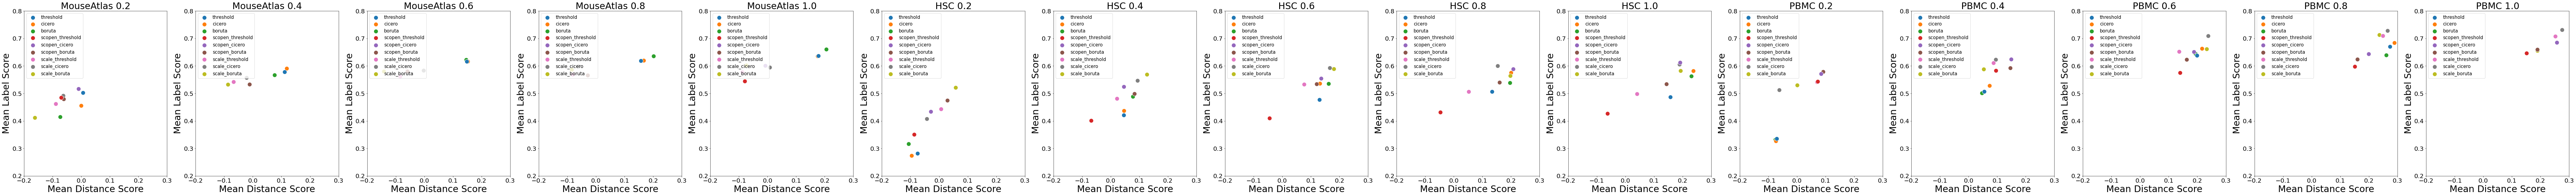

In [6]:
results, results_plotted = process(dataset_mapping.keys(), output_fname='../assets/all_scatterplots.png')

FileNotFoundError: [Errno 2] No such file or directory: 'assets/MouseAtlasSampleImportance_wo_pca_all_all_3.jpeg'

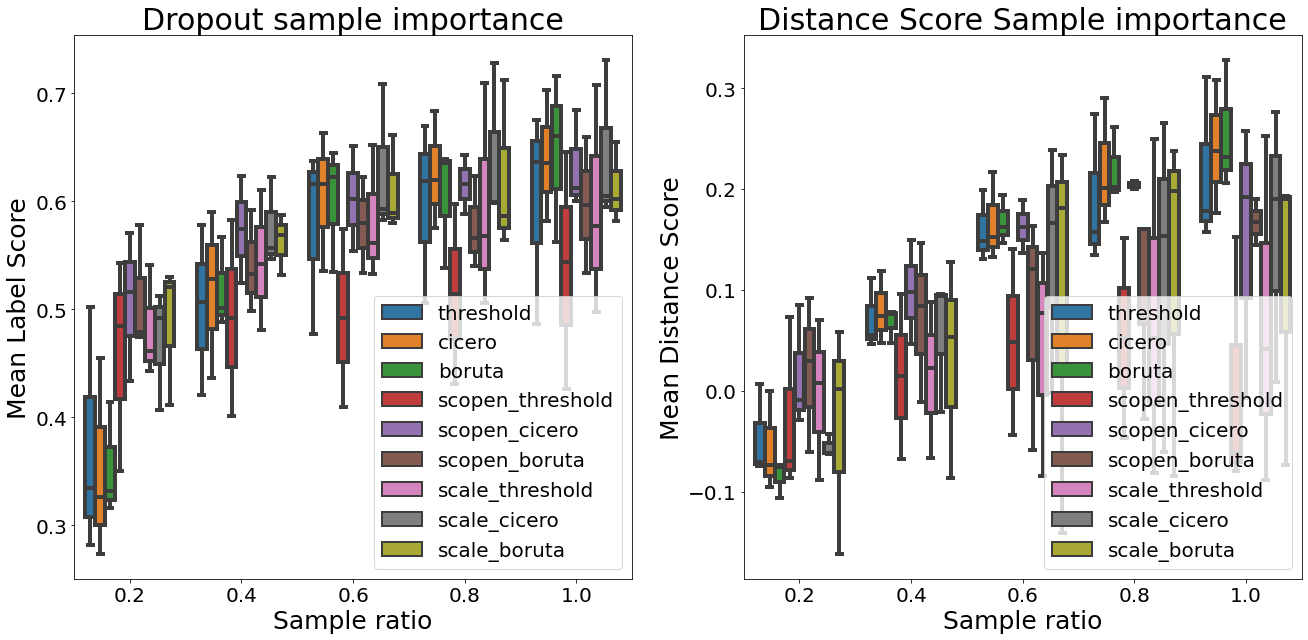

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(22, 10))


plot = sns.boxplot(
    ax=ax[0],
    data=results_plotted
    .reset_index(), x='sampling_method', y='mean_val_not_distance', hue='method',
    hue_order=['threshold', 'cicero', 'boruta', 'scopen_threshold',  'scopen_cicero', 'scopen_boruta', 'scale_threshold', 'scale_cicero', 'scale_boruta'],
    linewidth=4,
)
# ax[0].text(0.05, 0.3, 'a', 
#        fontsize = 40,          # Size
#        color = "black",          # Color
#        ha = "center", # Horizontal alignment
#        va = "center")
ax[0].tick_params(labelsize=20)
plot.legend(fontsize=20)
plot.set_title(f'Label Score Sample importance', fontsize=25)
plot.set_ylabel(f'Mean Label Score', fontsize=25)
plot.set_xlabel(f'Sample ratio', fontsize=25)
plot.set_title('Dropout sample importance', fontsize=30)

plot = sns.boxplot(
    ax=ax[1],
    data=results_plotted.reset_index(), x='sampling_method', y='mean_val_distance', hue='method',
    hue_order=['threshold', 'cicero', 'boruta', 'scopen_threshold',  'scopen_cicero', 'scopen_boruta', 'scale_threshold', 'scale_cicero', 'scale_boruta'],
    linewidth=4,
)
# ax[1].text(0.05, 0.3, 'b', 
#        fontsize = 40,          # Size
#        color = "black",          # Color
#        ha = "center", # Horizontal alignment
#        va = "center")
ax[1].tick_params(labelsize=20)
plot.legend(fontsize=20, markerscale=20)
plot.set_title(f'Sample importance', fontsize=25)
plot.set_ylabel(f'Mean Distance Score', fontsize=25)
plot.set_xlabel(f'Sample ratio', fontsize=25)
plot.set_title('Distance Score Sample importance', fontsize=30)
plt.savefig(f'assets/MouseAtlasSampleImportance_wo_pca_all_all_3.jpeg', bbox_inches='tight')

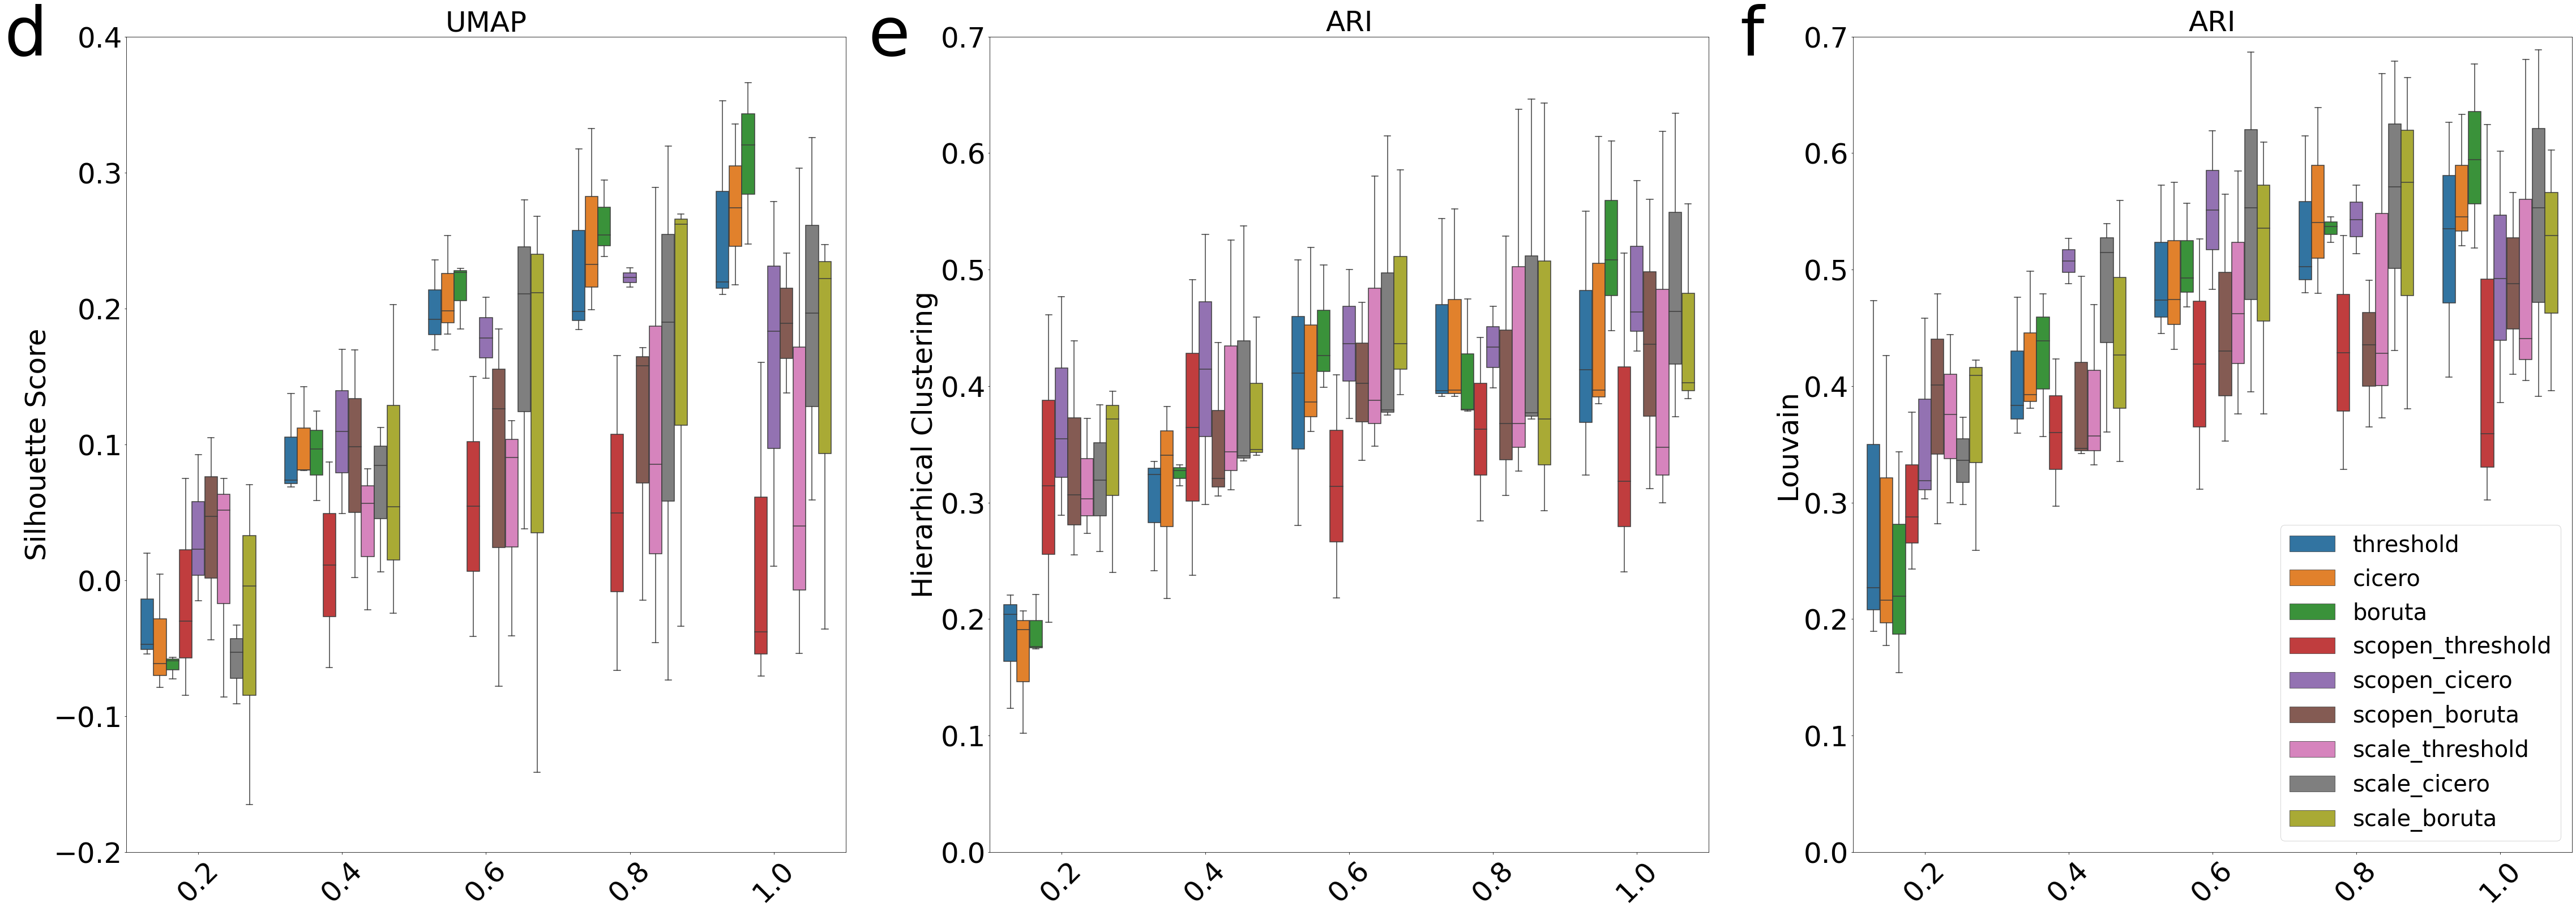

In [20]:
## Drawing per metric



fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20 * 3, 20))


mapping = ['Silhouette Score', 'Hierarhical Clustering', 'KMeans', 'Louvain']
metrics = ['distance_umap', 'hc_ari', 'louvain_ari']
for index, metric in enumerate(metrics):
    
    col = index % 3
    row = index // 3
    
    
    subset_df = results[results.Metric == metric]
    
    plot = sns.boxplot(
        data=subset_df, y='vals', hue='method',
        x='sampling_method',
        ax=ax[col],
        hue_order=['threshold', 'cicero', 'boruta', 'scopen_threshold',  'scopen_cicero', 'scopen_boruta', 'scale_threshold', 'scale_cicero', 'scale_boruta'],
#         hue_order=['big', 'small'],
    
    )
    
    if metric.startswith('distance'):
        metric = metric.replace('distance', 'silhouette')

    
    if metric.startswith('distance'):
        metric = metric.replace('distance', 'silhouette')
    
    
    plot.set_xlabel(f'', fontsize=50)
    if col == 0:
        ylim = 0.4
        plot.set_ylim((-0.2, ylim))
    else:
        ylim = 0.7
        plot.set_ylim((0.0, ylim))
        
    letter = chr(ord('d') + index)
    plot.text(-1.2, ylim, letter, 
       fontsize = 120,          # Size
       color = "black",          # Color
       ha = "center", # Horizontal alignment
       va = "center")
        
    if col == 0:
        plot.set_title('UMAP', fontsize=50)
        plot.set_ylabel('Silhouette Score', fontsize=50)
    elif col == 1:
        plot.set_title('ARI', fontsize=50)
        plot.set_ylabel('Hierarhical Clustering', fontsize=50)
    else:
        plot.set_title('ARI', fontsize=50)
        plot.set_ylabel('Louvain', fontsize=50)
    
    if col < 2:
        plot.get_legend().remove()
    else:
        plot.legend(fontsize=40, loc='lower right')
        
    
    current_ax = ax[col]
    current_ax.set_xticklabels(current_ax.get_xticklabels(),rotation=45)
    ax[col].tick_params(labelsize=50)

plt.subplots_adjust(left=0.0,
                bottom=0.0,
                right=1.0,
                top=1.0,
                wspace=0.2,
                hspace=0.2)
    
plt.savefig(f'../assets/All_subsampling__all_3.jpeg', bbox_inches='tight')